<a href="https://colab.research.google.com/github/khatamirock/colabs_AI_LAB/blob/main/logistic_Regression_with_multi_variable_coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

%matplotlib inline

Cloning into 'Machine-Learning-Specialization-Coursera'...
remote: Enumerating objects: 1052, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 1052 (delta 217), reused 189 (delta 178), pack-reused 760
Receiving objects: 100% (1052/1052), 41.05 MiB | 24.55 MiB/s, done.
Resolving deltas: 100% (384/384), done.


In [32]:
data='/content/Machine-Learning-Specialization-Coursera/C1 - Supervised Machine Learning - Regression and Classification/week2/Optional Labs/data/houses.txt'
df=pd.read_csv(data, sep=',',header =None)
df.head()

,0,1,2,3,4
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [ ]:
X_train,y_train=df.iloc[:, :4].values,df[4].values
X_train

In [24]:
data = np.loadtxt(data, delimiter=',')
X_train,y_train = data[:,:4],data[:,4]

# [-459.44619033 -459.68696633 -459.68734133 -459.68149   ] 2104
X_train[:20],y_train[:10]

(array([[9.520e+02, 2.000e+00, 1.000e+00, 6.500e+01],
        [1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
        [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
        [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
        [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01],
        [1.314e+03, 2.000e+00, 1.000e+00, 1.400e+01],
        [8.640e+02, 2.000e+00, 1.000e+00, 6.600e+01],
        [1.836e+03, 3.000e+00, 1.000e+00, 1.700e+01],
        [1.026e+03, 3.000e+00, 1.000e+00, 4.300e+01],
        [3.194e+03, 4.000e+00, 2.000e+00, 8.700e+01],
        [7.880e+02, 2.000e+00, 1.000e+00, 8.000e+01],
        [1.200e+03, 2.000e+00, 2.000e+00, 1.700e+01],
        [1.557e+03, 2.000e+00, 1.000e+00, 1.800e+01],
        [1.430e+03, 3.000e+00, 1.000e+00, 2.000e+01],
        [1.220e+03, 2.000e+00, 1.000e+00, 1.500e+01],
        [1.092e+03, 2.000e+00, 1.000e+00, 6.400e+01],
        [8.480e+02, 1.000e+00, 1.000e+00, 1.700e+01],
        [1.682e+03, 3.000e+00, 2.000e+00, 2.300e+01],
        [1.768e+03, 3.000e+0

In [9]:
print ('The shape of x_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of x_train is: (100, 4)
The shape of y_train is:  (100,)
Number of training examples (m): 100


In [79]:
def calc_pred(w,x,b,p):

  cos=np.dot(w,x)+b
  # if p==1:print('cal+pred', w,x,b,cos)
  return cos

def compute_cost(w,x,y,b):

  m=len(y)
  cost=0
  for i in range(m):
    cos=calc_pred(w,x[i],b,0)
    # print(w)
    # print(x[i])
    # print(b)
    cost+=(cos-y[i])**2
  return cost/(2*m)




In [90]:

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

cost = compute_cost(w_init,X_train, y_train, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


**Expected Result: Cost at optimal w : 1 5578904045996674e-12**

In [41]:
X_train.mean(axis=0)
X_train.std(axis=0)

array([412.17283499,   0.65261014,   0.48538644,  25.78502472])

In [97]:
def compute_gradient(X,y,w,b):
  n=X_train.shape[1]
  m=len(X_train)
  # print(n,m,b)

  m,n = X.shape           #(number of examples, number of features)
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    err = (np.dot(X[i], w) + b) - y[i]
    for j in range(n):
        dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db







In [98]:
#Compute and display gradient
dw,db=compute_gradient(X_train, y_train, w_init, b_init)

print(f'dj_db at initial w,b: {dw}')
print(f'dj_dw at initial w,b: \n {db}')

dj_db at initial w,b: [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]
dj_dw at initial w,b: 
 -1.6739251501955248e-06


**Expected Result:
dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b:
[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]**

In [99]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):


    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw,dj_db = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(w,X, y, b))
            # print( compute_cost(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [100]:
# initialize parameters
initial_w = [1,0,0,0]
initial_b = 0
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 29185.36   
Iteration  100: Cost   692.37   
Iteration  200: Cost   691.33   
Iteration  300: Cost   690.31   
Iteration  400: Cost   689.29   
Iteration  500: Cost   688.28   
Iteration  600: Cost   687.27   
Iteration  700: Cost   686.28   
Iteration  800: Cost   685.30   
Iteration  900: Cost   684.32   
Iteration  999: Cost   683.36   
b,w found by gradient descent: -0.00,[ 0.20458424  0.0014417  -0.01200102 -0.09005496] 
prediction: 426.39, target value: 460
prediction: 286.07, target value: 232
prediction: 171.14, target value: 178


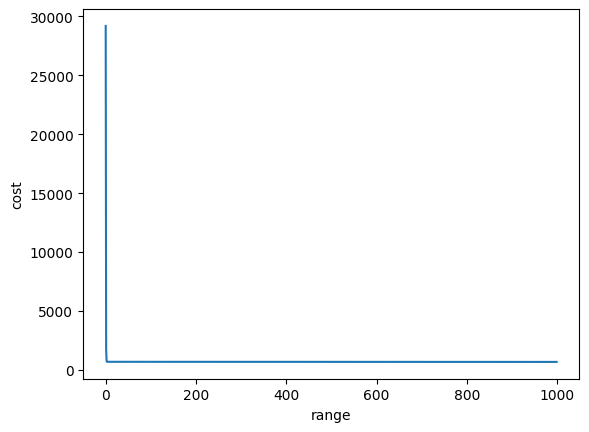

In [109]:
plt.plot(range(1000),J_hist)

plt.xlabel('range')
plt.ylabel('cost')


plt.show()